<a href="https://colab.research.google.com/github/pathikritsyam/ECTA/blob/main/ARIMA/DE_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ARIMA MODEL

In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_predict
from scipy.optimize import differential_evolution
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_df = pd.read_csv("processed_ds1.csv")
data_df

,Year,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,ALL INDIA
0,2004,9601.0,135,3470.7,2472.2,4383.3,14.3,145.2,1238.2,3023.00,...,10437.00,150.40,21.6,5062.2,.,545.1,9555.6,572.0,14884.8,83131.7
1,2005,11704.0,146.2,3552.5,3495.5,5011.6,24,147.3,1298.0,3210.00,...,10193.00,153.00,21.5,5220.0,.,552.9,11133.7,590.0,14510.8,91793.4
2,2006,11872.0,146.2,2916.0,4989.3,5041.4,31.1,130.3,1390.0,3371.00,...,10138.00,169.80,21.5,6610.6,.,620.5,11124.0,556.0,14745.9,93355.3
3,2007,13324.0,158.1,3319.0,4418.1,5426.6,31.4,121.6,1474.0,3613.00,...,10489.00,259.60,22.9,5040.2,.,624.6,11780.0,593.0,14719.5,96692.9
4,2008,14241.0,163.9,4008.5,5590.3,4391.8,31.4,123.3,1303.0,3298.00,...,11000.00,241.10,21.7,5182.7,.,627.1,13097.0,582.0,15037.3,99182.5
5,2009,10538.0,215.8,4335.9,3599.3,4110.4,19.3,100.6,1292.0,3625.00,...,11236.00,228.30,24.3,5665.2,.,640,10807.1,608.0,14340.7,89092.9
6,2010,7882.4,234.0,4736.6,3102.1,6159.0,19.6,115.0,1496.6,3472.00,...,10837.00,265.50,21.0,5792.4,6535.6,702.5,11992.0,550.4,13045.9,95979.8
7,2011,7746.2,255.0,4516.3,7162.6,6028.4,19.8,121.8,1790.0,3759.00,...,10542.00,253.40,20.9,7458.7,5148.8,718.3,14022.0,594.0,14605.8,105310.9
8,2012,6862.4,263.0,5128.5,7529.3,6608.8,19.7,122.8,1541.0,3976.00,...,11374.00,222.50,21.3,4049.9,4647.6,713.2,14416.0,579.8,15023.7,105231.6
9,2013,6969.7,276.2,4927.1,5505.8,6716.4,29.6,126.5,1636.0,3998.00,...,11267.00,312.60,20.3,5349.8,5755.0,711.8,14636.0,578.6,15370.7,106645.5


# Forecasting for one State (West Bengal)

In [4]:
train = data_df["West Bengal"]
train

0     14884.8
1     14510.8
2     14745.9
3     14719.5
4     15037.3
5     14340.7
6     13045.9
7     14605.8
8     15023.7
9     15370.7
10    14677.2
11    15953.9
12    15302.5
13    14967.0
14    16242.2
15    15881.4
16    16524.4
17    16728.7
18    15636.9
Name: West Bengal, dtype: float64

In [5]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=95.774, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=99.417, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=97.422, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=99.425, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=97.864, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=97.777, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=95.043, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=97.039, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=97.012, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=99.011, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=97.036, Time=0.1

In [6]:
import statsmodels.api as sm

In [7]:
p=5
d=1
q=0

In [8]:
model=ARIMA(train, order=(p,d,q))
model_fit=model.fit()

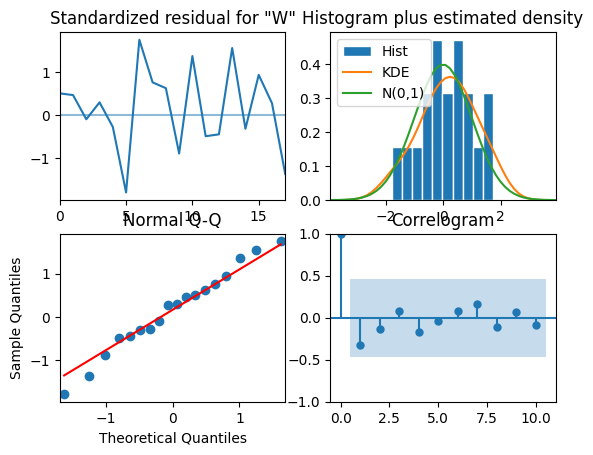

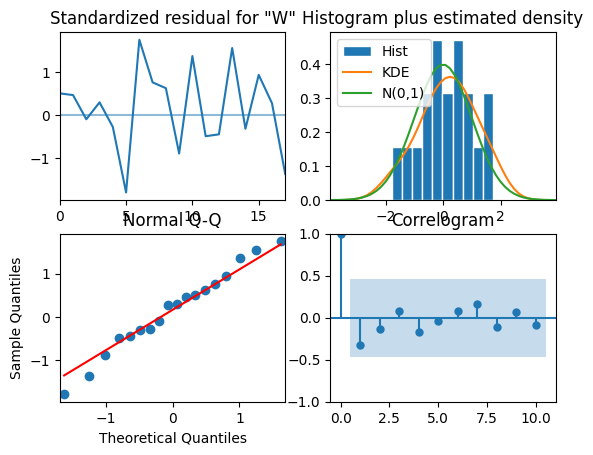

In [9]:
model_fit.plot_diagnostics()

In [10]:
forecast_wb = model_fit.forecast(5)

In [11]:
forecast_wb

19    15688.724870
20    15746.674588
21    15676.075763
22    15663.243679
23    15751.590688
Name: predicted_mean, dtype: float64

# For all states except Andhra & Telangana

In [12]:
data_df

,Year,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,ALL INDIA
0,2004,9601.0,135,3470.7,2472.2,4383.3,14.3,145.2,1238.2,3023.00,...,10437.00,150.40,21.6,5062.2,.,545.1,9555.6,572.0,14884.8,83131.7
1,2005,11704.0,146.2,3552.5,3495.5,5011.6,24,147.3,1298.0,3210.00,...,10193.00,153.00,21.5,5220.0,.,552.9,11133.7,590.0,14510.8,91793.4
2,2006,11872.0,146.2,2916.0,4989.3,5041.4,31.1,130.3,1390.0,3371.00,...,10138.00,169.80,21.5,6610.6,.,620.5,11124.0,556.0,14745.9,93355.3
3,2007,13324.0,158.1,3319.0,4418.1,5426.6,31.4,121.6,1474.0,3613.00,...,10489.00,259.60,22.9,5040.2,.,624.6,11780.0,593.0,14719.5,96692.9
4,2008,14241.0,163.9,4008.5,5590.3,4391.8,31.4,123.3,1303.0,3298.00,...,11000.00,241.10,21.7,5182.7,.,627.1,13097.0,582.0,15037.3,99182.5
5,2009,10538.0,215.8,4335.9,3599.3,4110.4,19.3,100.6,1292.0,3625.00,...,11236.00,228.30,24.3,5665.2,.,640,10807.1,608.0,14340.7,89092.9
6,2010,7882.4,234.0,4736.6,3102.1,6159.0,19.6,115.0,1496.6,3472.00,...,10837.00,265.50,21.0,5792.4,6535.6,702.5,11992.0,550.4,13045.9,95979.8
7,2011,7746.2,255.0,4516.3,7162.6,6028.4,19.8,121.8,1790.0,3759.00,...,10542.00,253.40,20.9,7458.7,5148.8,718.3,14022.0,594.0,14605.8,105310.9
8,2012,6862.4,263.0,5128.5,7529.3,6608.8,19.7,122.8,1541.0,3976.00,...,11374.00,222.50,21.3,4049.9,4647.6,713.2,14416.0,579.8,15023.7,105231.6
9,2013,6969.7,276.2,4927.1,5505.8,6716.4,29.6,126.5,1636.0,3998.00,...,11267.00,312.60,20.3,5349.8,5755.0,711.8,14636.0,578.6,15370.7,106645.5


In [17]:
data_df = data_df.drop(columns = ["Andhra Pradesh", "Telangana"])

In [18]:
states = data_df.columns[1:-1]
states

Index(['Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'NCT of Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [19]:
forecast_df = pd.DataFrame()

In [20]:
for state in states:
  if (state!=("Andhra Pradesh" or "Telangana")):
    print(state)
    train = data_df[state]
    if (train =='-').any():
        train[18] = train[17]  #Replacing any missing values in rice production of each state in the year 2022 by those of the previous year.
    stepwise_model = auto_arima(train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
    # print(type(train.to_numpy(dtype = float)))
    # print(train.to_numpy())
    model=ARIMA(train.astype(float), order=(5,1,0))
    model_fit=model.fit()
    forecast = model_fit.forecast(5)
    print(f"type of forecats{type(forecast)}")
    print(forecast)
    forecast_df[state] = forecast.values

Arunachal Pradesh
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=60.524, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=55.492, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=58.792, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=57.490, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=59.487, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=56.574, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=56.795, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=58.518, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=55.499, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.773 seconds
type of forecats<class 'pandas.core.series.Series'>
19    252.668347
20    252.811185
21    252.812567
22    252.743593
23    252.747957
Name: predicted

In [21]:
forecast_df

,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,252.668347,4915.769202,5576.064062,7559.965456,18.576760,95.002949,2381.859456,5092.344397,129.586767,553.459872,...,9387.462886,61.037223,12862.300391,605.145633,15.599447,7762.609482,826.930881,15156.152651,657.822344,15688.724870
1,252.811185,4696.885628,6288.504599,7607.027182,16.834676,98.396646,2421.946084,5214.249369,142.848728,559.977230,...,9406.837452,55.240700,12652.446705,587.780983,15.518312,7726.433863,824.107486,15139.013801,687.045406,15746.674588
2,252.812567,4882.626269,6738.404864,7288.017285,17.542837,98.674878,2526.378294,5425.079658,144.999763,541.264947,...,9284.778858,56.667042,13241.235010,539.973649,15.635541,7975.512268,829.283191,15139.984672,698.345183,15676.075763
3,252.743593,4417.369235,6670.118670,7198.169998,18.319870,100.597624,2577.483504,5437.839250,152.651716,537.745096,...,9224.063534,58.975497,13171.116978,655.044296,15.495962,7977.181676,826.218416,15146.809931,661.774099,15663.243679
4,252.747957,4796.105463,6274.272761,7413.119897,18.631459,99.420811,2635.447427,5643.596461,123.208909,531.064298,...,9215.656916,58.339320,13078.417173,579.173904,15.460658,7872.789479,837.779104,15147.528888,664.813835,15751.590688


In [22]:
forecast_df.index = ["2023-24", "2024-25","2025-26", "2026-27", "2027-28"]

In [23]:
forecast_df

,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
2023-24,252.668347,4915.769202,5576.064062,7559.965456,18.576760,95.002949,2381.859456,5092.344397,129.586767,553.459872,...,9387.462886,61.037223,12862.300391,605.145633,15.599447,7762.609482,826.930881,15156.152651,657.822344,15688.724870
2024-25,252.811185,4696.885628,6288.504599,7607.027182,16.834676,98.396646,2421.946084,5214.249369,142.848728,559.977230,...,9406.837452,55.240700,12652.446705,587.780983,15.518312,7726.433863,824.107486,15139.013801,687.045406,15746.674588
2025-26,252.812567,4882.626269,6738.404864,7288.017285,17.542837,98.674878,2526.378294,5425.079658,144.999763,541.264947,...,9284.778858,56.667042,13241.235010,539.973649,15.635541,7975.512268,829.283191,15139.984672,698.345183,15676.075763
2026-27,252.743593,4417.369235,6670.118670,7198.169998,18.319870,100.597624,2577.483504,5437.839250,152.651716,537.745096,...,9224.063534,58.975497,13171.116978,655.044296,15.495962,7977.181676,826.218416,15146.809931,661.774099,15663.243679
2027-28,252.747957,4796.105463,6274.272761,7413.119897,18.631459,99.420811,2635.447427,5643.596461,123.208909,531.064298,...,9215.656916,58.339320,13078.417173,579.173904,15.460658,7872.789479,837.779104,15147.528888,664.813835,15751.590688


In [ ]:
forecast_df.to_csv("forecast_without_ap&ts.csv")